In [35]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
from cellpose import models, io
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 初始化CellPose模型
model = models.Cellpose(gpu=False, model_type='cyto3')

100%|██████████| 25.3M/25.3M [00:02<00:00, 10.2MB/s]
100%|██████████| 3.54k/3.54k [00:00<00:00, 3.63MB/s]


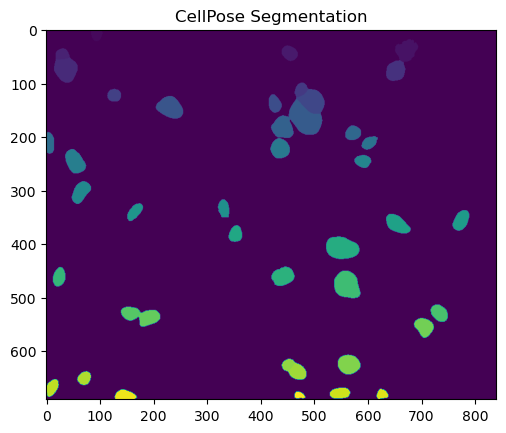

In [36]:
# 加载图像（替换为您的图像路径）
# 使用示例
# 替换为您的图像文件路径
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-ct-bi-crop.bmp'  # 替换为您的图像路径
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 运行CellPose模型
# 注意：channels可以根据您的图像进行调整
# channels=[0,0] 表示图像是一个灰度图像
masks, flows, styles, diams = model.eval(image, diameter=50, channels=[0,0])

# 显示mask
plt.imshow(masks)
plt.title('CellPose Segmentation')
plt.show()

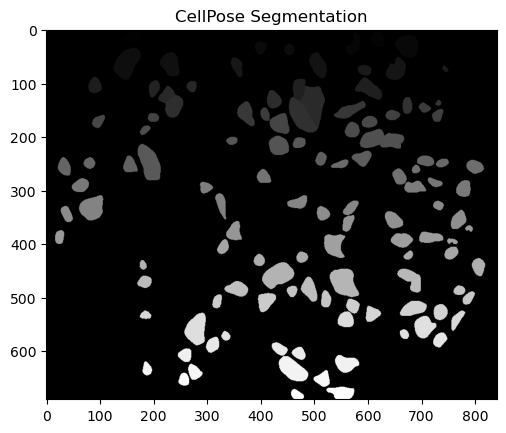

In [39]:
# 加载图像（替换为您的图像路径）
# 使用示例
# 替换为您的图像文件路径
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-downsamp-contrast.bmp'  # 替换为您的图像路径
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 运行CellPose模型
# 注意：channels可以根据您的图像进行调整
# channels=[0,0] 表示图像是一个灰度图像
masks, flows, styles, diams = model.eval(image, diameter=50, channels=[0,0])

# 显示mask
plt.imshow(masks, cmap='gray')
plt.title('CellPose Segmentation')
plt.show()

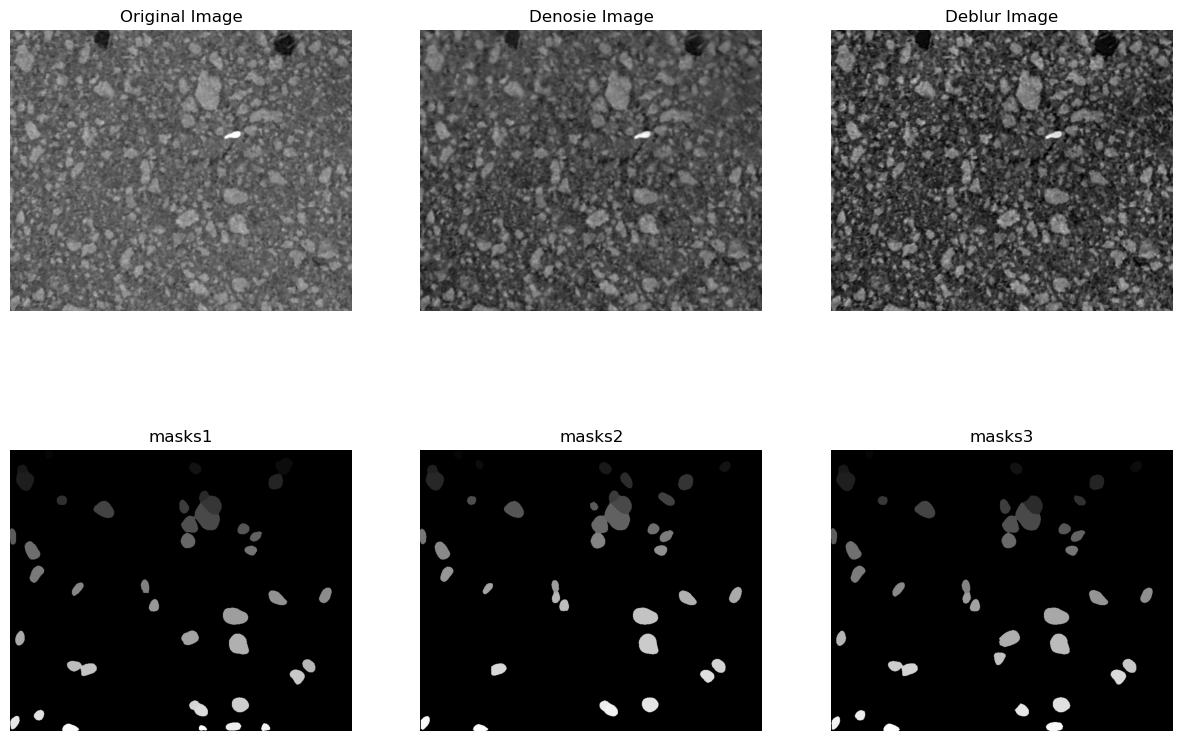

True

In [38]:
import os, cv2
from cellpose import denoise

path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1-ct-bi-crop.bmp'  # 替换为您的图像路径
save_path = f'{path}/4-1-1-ct-deblur.bmp'  # 替换为您的图像路径
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

dn = denoise.DenoiseModel(model_type="denoise_cyto3", gpu=False)

db = denoise.DenoiseModel(model_type="deblur_cyto3", gpu=False)

imgs_dn = dn.eval(image, channels=[0, 0], diameter=50.)

imgs_dnb = db.eval(image, channels=[0, 0], diameter=25.)

masks1, flows, styles, diams = model.eval(image, diameter=50, channels=[0,0])
masks2, flows, styles, diams = model.eval(imgs_dn, diameter=50, channels=[0,0])
masks3, flows, styles, diams = model.eval(imgs_dnb, diameter=50, channels=[0,0])


# 显示mask
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(imgs_dn, cmap='gray')
plt.title('Denosie Image'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(imgs_dnb, cmap='gray')
plt.title('Deblur Image'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(masks1, cmap='gray')
plt.title('masks1'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(masks2, cmap='gray')
plt.title('masks2'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(masks3, cmap='gray')
plt.title('masks3'), plt.axis('off')
plt.show()

imgs_dnb_scaled = (imgs_dnb * 255).astype(np.uint8)
cv2.imwrite(save_path, imgs_dnb_scaled)